# Car Selling price Perdiction


### Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pickle
from datetime import datetime
from sklearn.svm import SVR
import calendar
from sklearn.preprocessing import LabelEncoder


#### Read Data

In [2]:
read=pd.read_csv("car data.csv")
df=pd.DataFrame(read)
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### Data Preprocessing

In [3]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.isnull().sum()
#no null values data already cleaned

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [7]:
df[df.duplicated()]
#2 duplicate rowa  in this dataset


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [8]:
df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [9]:
df['Car_Name'].value_counts()
#98 cars in this dataset

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [10]:
df['Fuel_Type'].value_counts()


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [11]:
df['Selling_type'].value_counts()


Dealer        195
Individual    106
Name: Selling_type, dtype: int64

#### Data Visulization

Text(0.5, 1.0, 'Owners Belong to which Number 0,1,2')

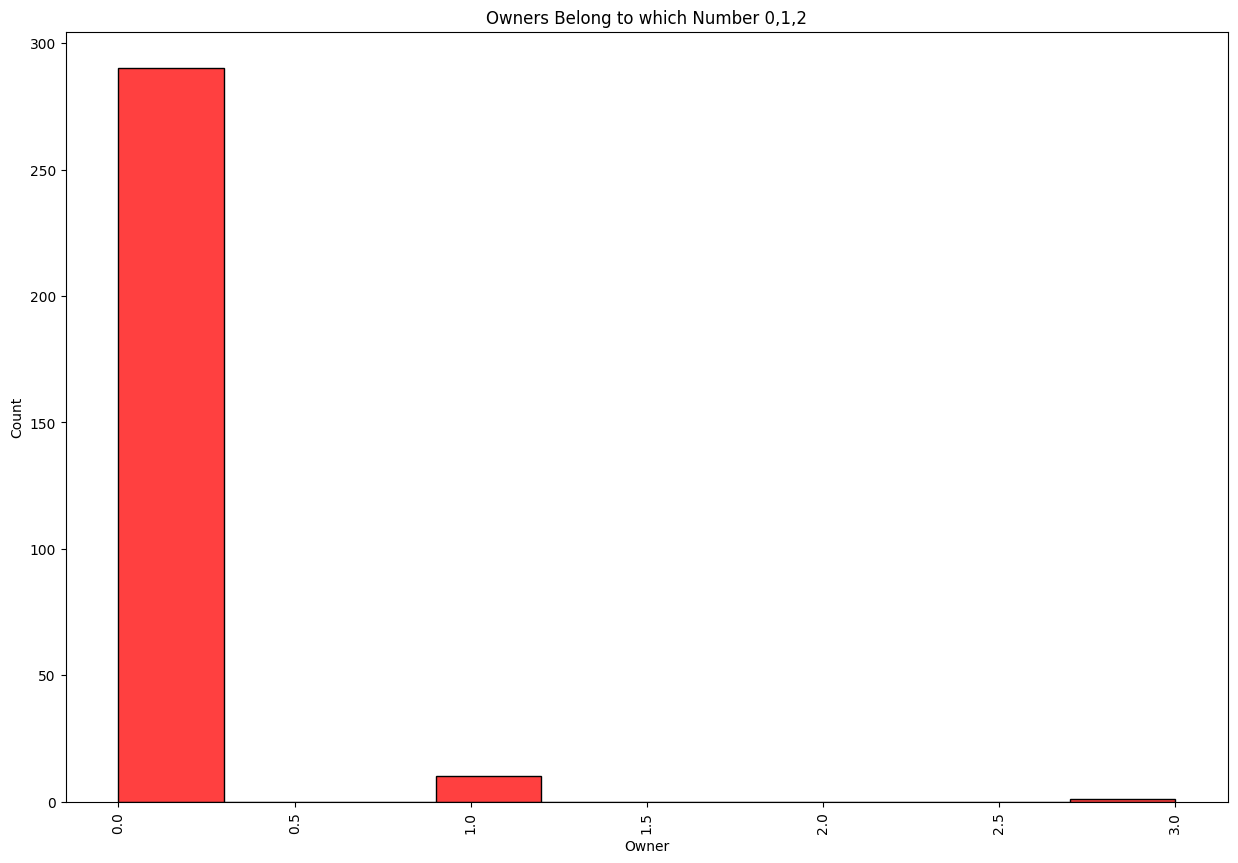

In [12]:
plt.figure(figsize=(15, 10))
sns.histplot(df['Owner'],color="red")
plt.xticks(rotation=90)
plt.title('Owners Belong to which Number 0,1,2')
#MOstly cars are belongs to its actuall owner 0 mean 1st owner 1 mean second  mean third owner of this car


Text(0.5, 1.0, 'Count the cars by using Name')

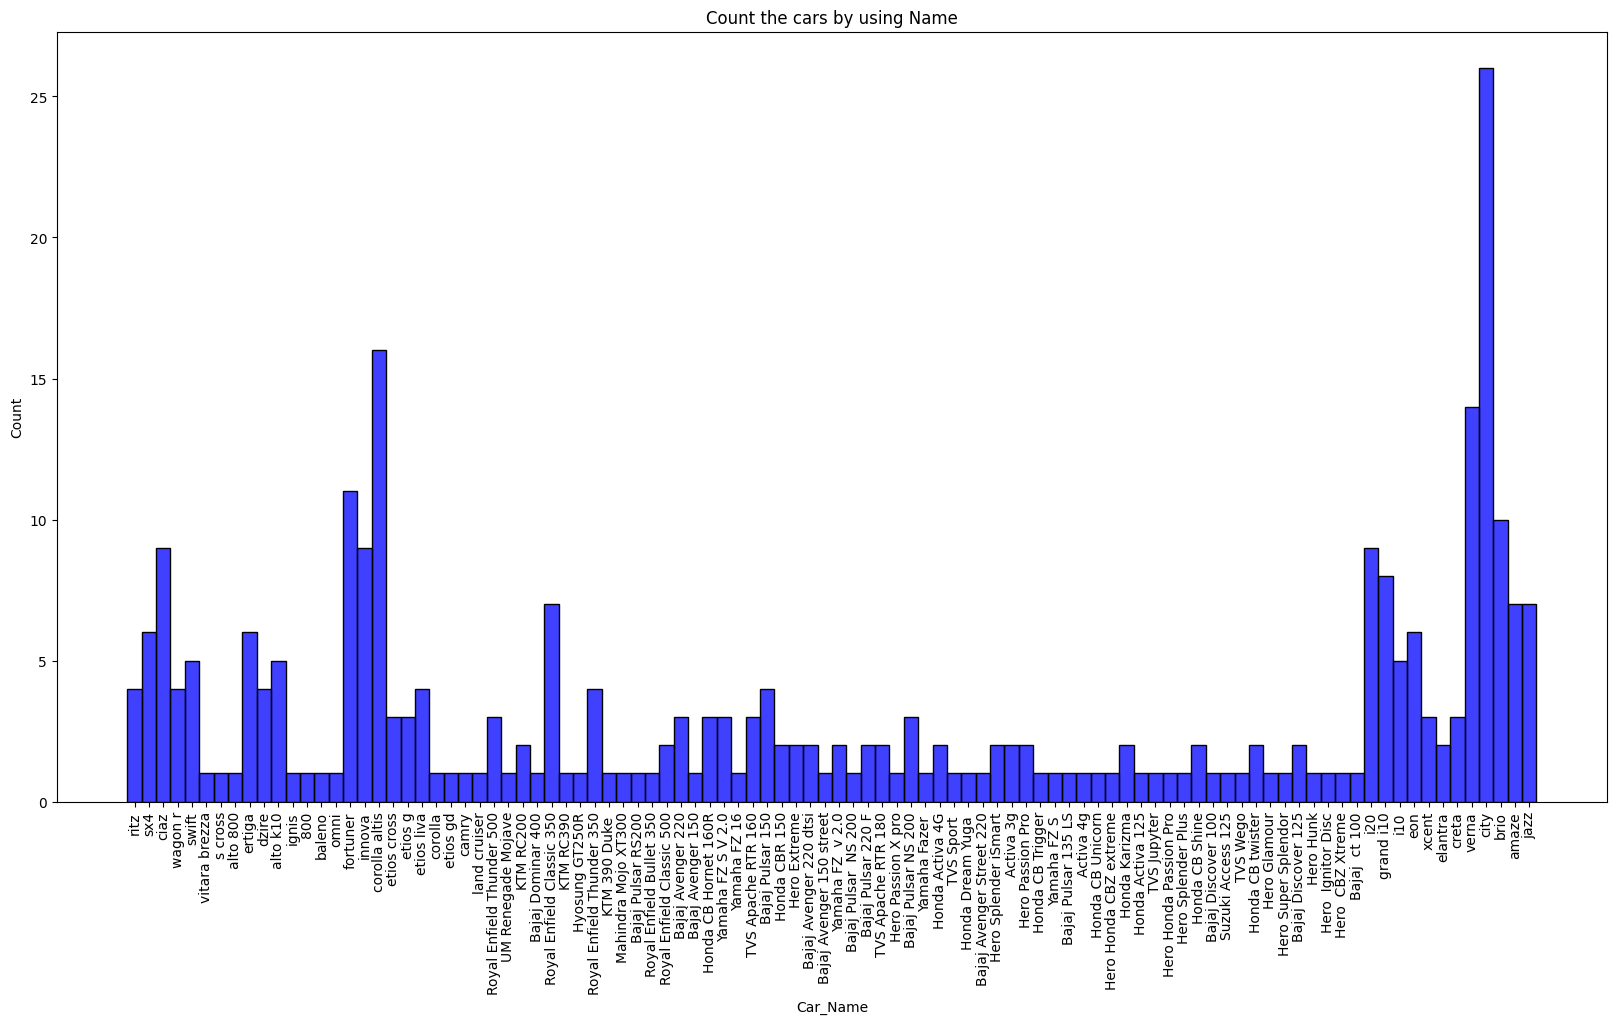

In [13]:
plt.figure(figsize=(20, 10))
sns.histplot(df['Car_Name'],color="blue")
plt.xticks(rotation=90)
plt.title('Count the cars by using Name')
#Mostly people use CITY car

Text(0.5, 1.0, 'Sellin type delaer or individual')

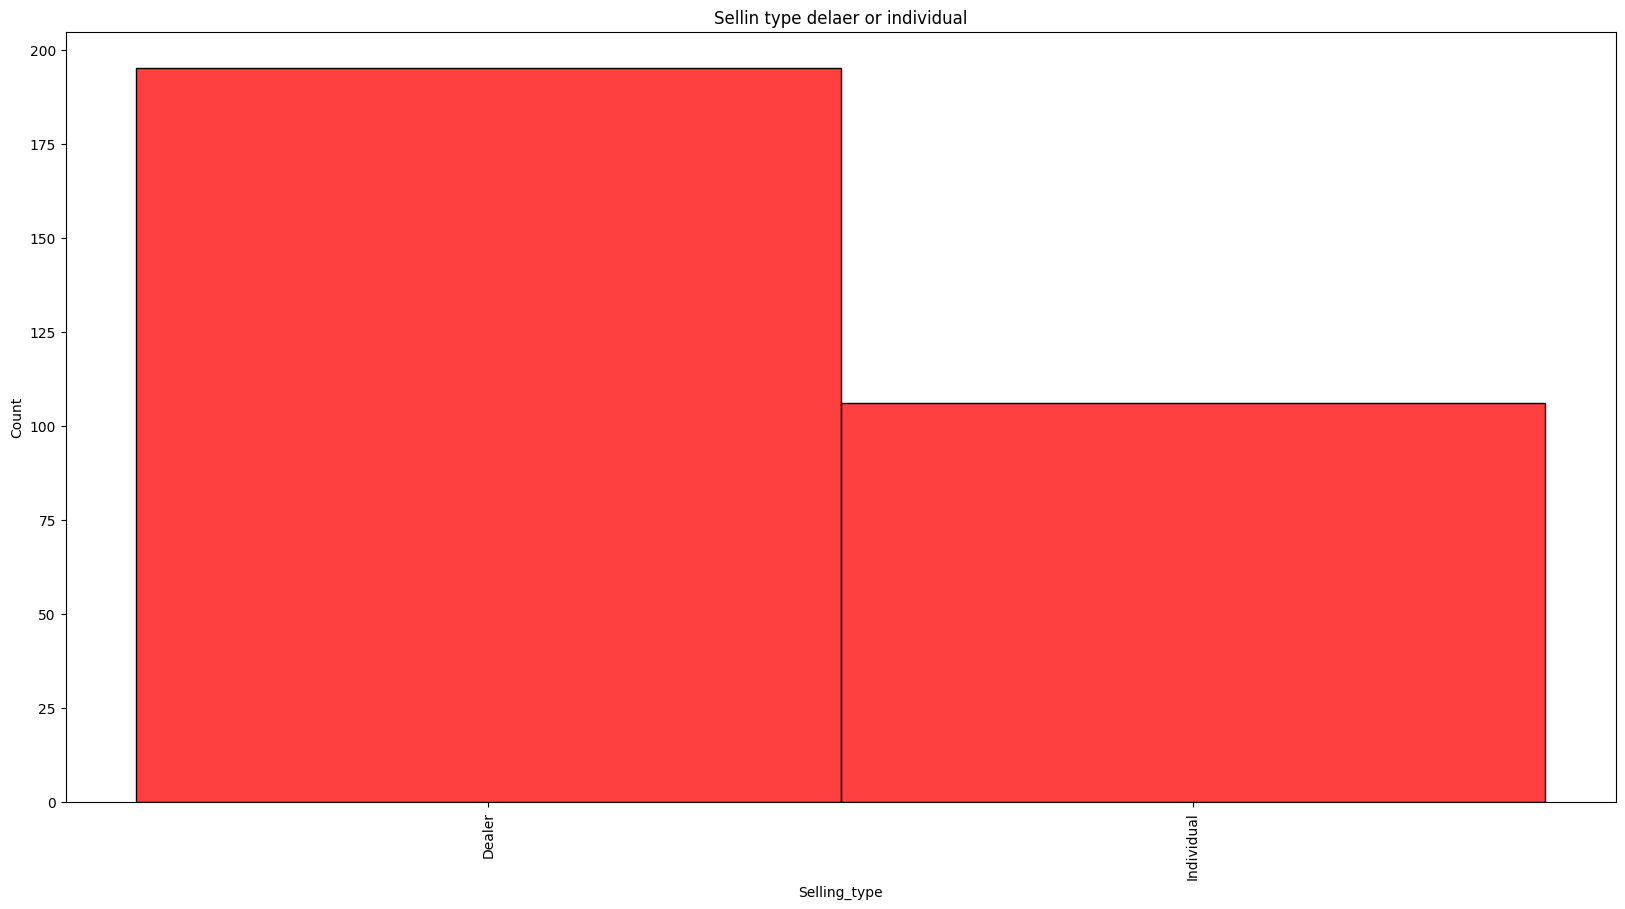

In [14]:
plt.figure(figsize=(20, 10))
sns.histplot(df['Selling_type'],color="red")
plt.xticks(rotation=90)
plt.title('Sellin type delaer or individual')
#Mostly cars selled through dealers

Text(0.5, 1.0, 'Petrol Disel CNG Which one is Type of Fuel')

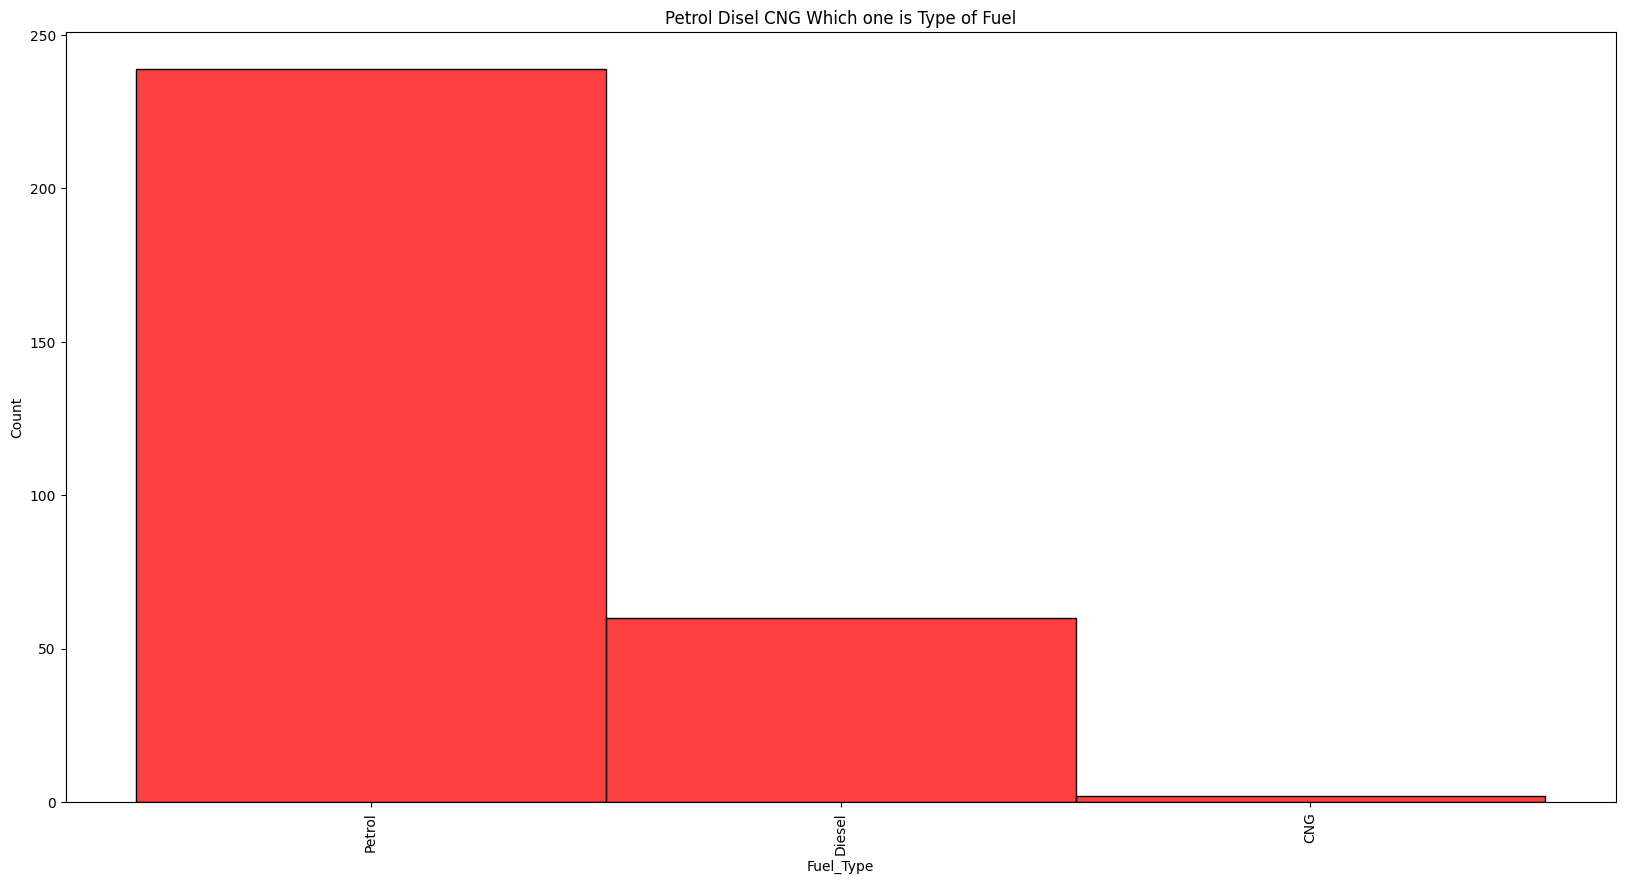

In [15]:
plt.figure(figsize=(20, 10))
sns.histplot(df['Fuel_Type'],color="red")
plt.xticks(rotation=90)
plt.title('Petrol Disel CNG Which one is Type of Fuel')

#80% cars using Petrol


Text(0.5, 1.0, 'Count the cars by using MOdel of Year ')

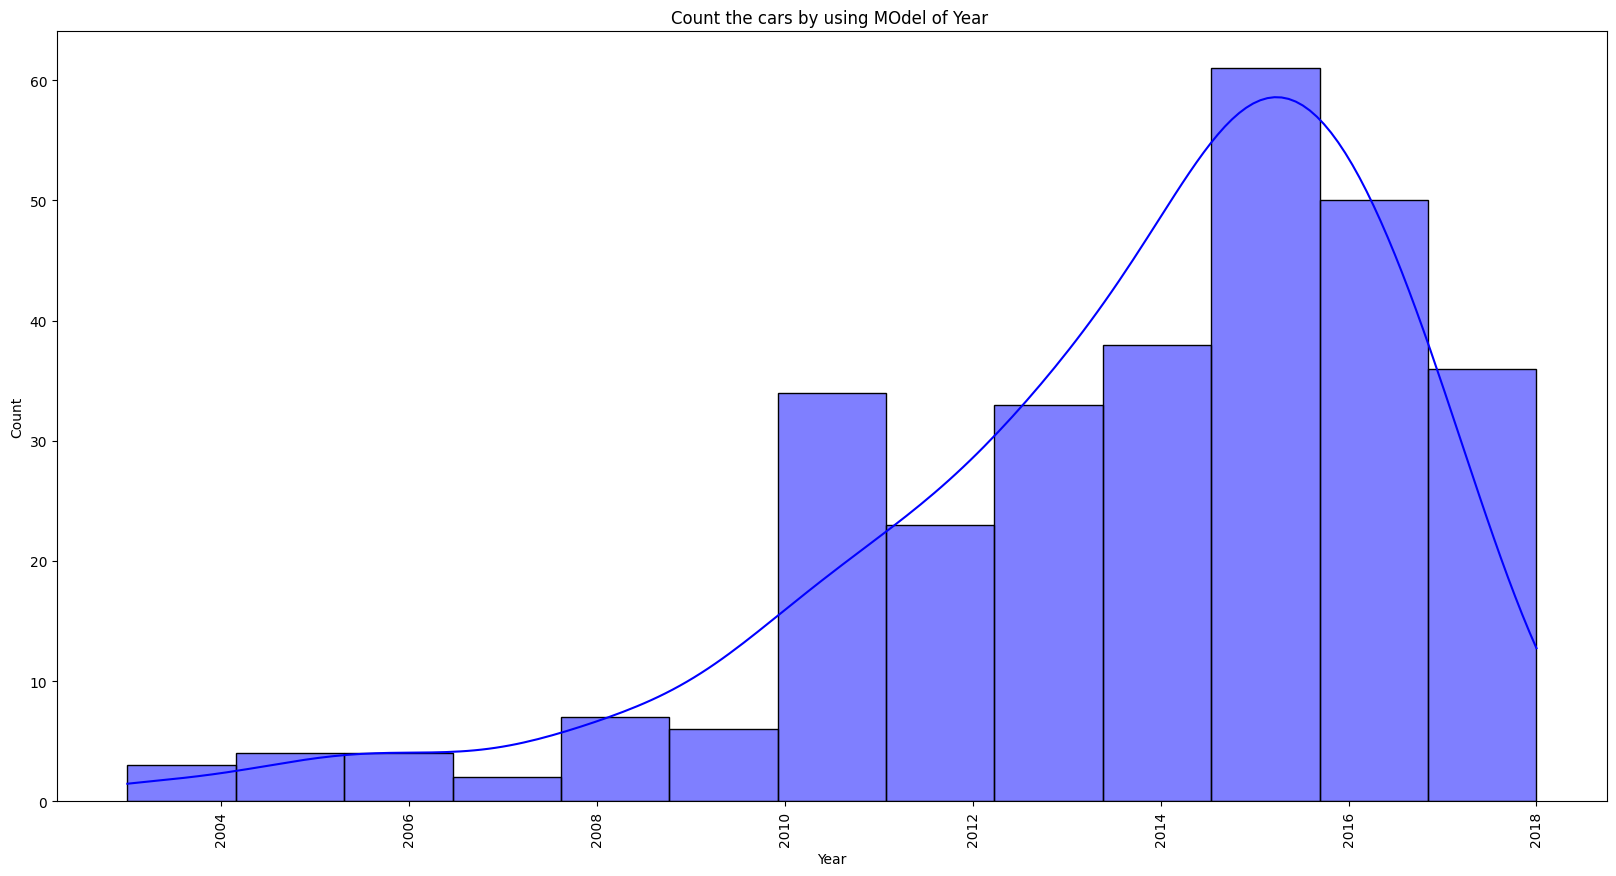

In [16]:
plt.figure(figsize=(20, 10))
sns.histplot(df['Year'],color="blue",kde=True)
plt.xticks(rotation=90)
plt.title('Count the cars by using MOdel of Year ')

#MOstly cars are Manufactured in 2015

Text(0.5, 1.0, 'Count the cars by using Name')

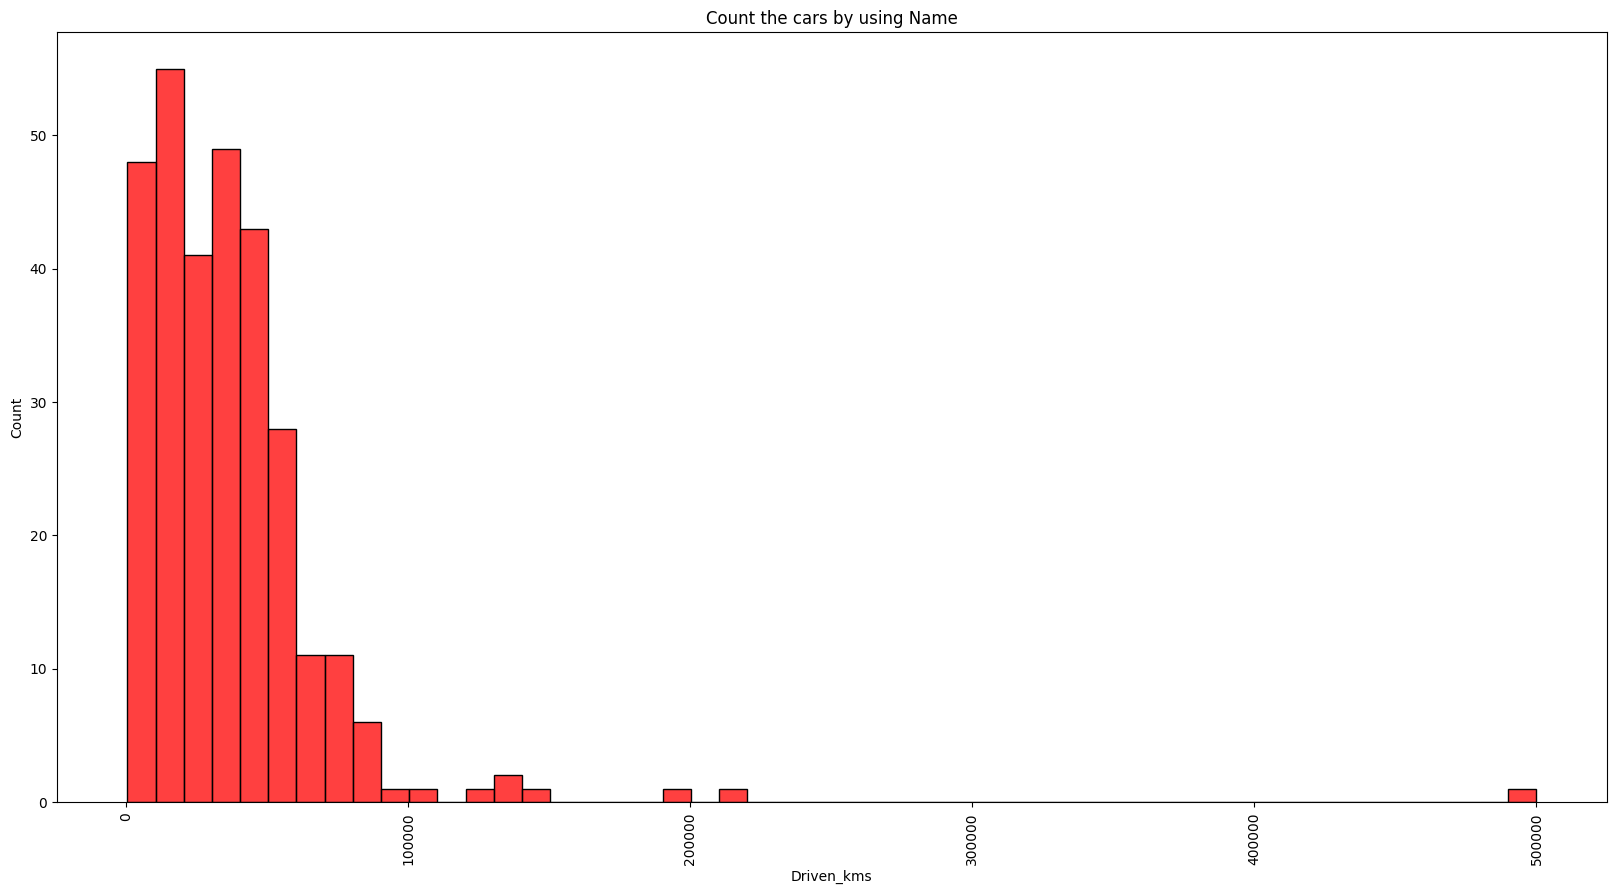

In [17]:
plt.figure(figsize=(20, 10))
sns.histplot(df["Driven_kms"],color="red")
plt.xticks(rotation=90)
plt.title('Count the cars by using Name')
#Mostly cars are driven 20000 kms 

Text(0.5, 1.0, 'Car is Maunal or Auto')

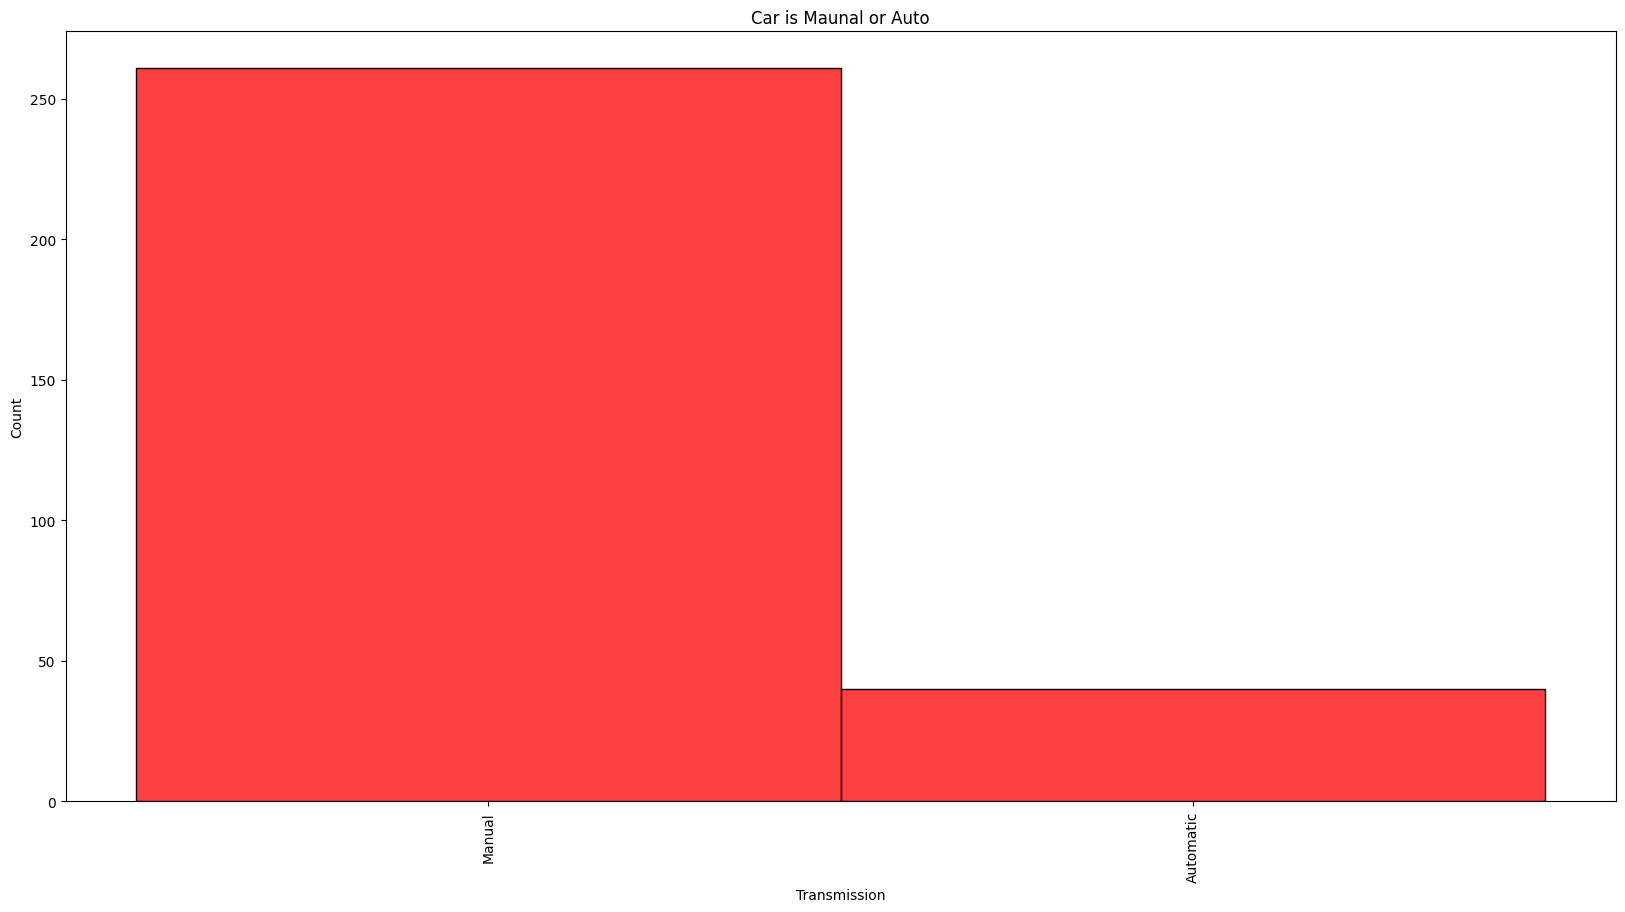

In [18]:
plt.figure(figsize=(20, 10))
sns.histplot(df["Transmission"],color="red")
plt.xticks(rotation=90)
plt.title('Car is Maunal or Auto')
#Mostly cars are driven 20000 kms 


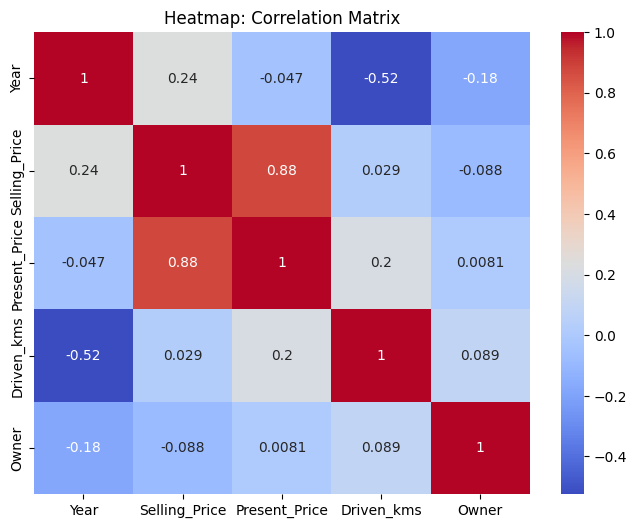

In [19]:
correlation_matrix = df.corr( numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap: Correlation Matrix')
plt.show()

#### Feature Engineering

In [20]:
#Catagorical dataTypes are Encoded
label_encoder = LabelEncoder()
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])
df["Selling_type"]=label_encoder.fit_transform(df["Selling_type"])
df["Fuel_Type"]=label_encoder.fit_transform(df["Fuel_Type"])
df["Car_Name"]=label_encoder.fit_transform(df["Car_Name"])




In [21]:
#Numerical Feature Scalling
numerical_features = ["Driven_kms","Year","Selling_Price","Present_Price","Owner"]

scaler_minmax = MinMaxScaler()
df[numerical_features] = scaler_minmax.fit_transform(df[numerical_features])

In [22]:
df.describe()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,62.571429,0.708527,0.130696,0.079199,0.072967,1.787375,0.352159,0.867110,0.014396
std,25.573535,0.192770,0.145639,0.093656,0.077852,0.425801,0.478439,0.340021,0.082638
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.600000,0.022923,0.009536,0.029029,2.000000,0.000000,1.000000,0.000000
50%,69.000000,0.733333,0.100287,0.065886,0.063063,2.000000,0.000000,1.000000,0.000000
75%,82.000000,0.866667,0.169054,0.103814,0.096631,2.000000,1.000000,1.000000,0.000000
max,97.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000


#### Model Training

In [23]:
x = df.drop(['Selling_Price'], axis=1)
y=df["Selling_Price"]
print(x.columns)

Index(['Car_Name', 'Year', 'Present_Price', 'Driven_kms', 'Fuel_Type',
       'Selling_type', 'Transmission', 'Owner'],
      dtype='object')


In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Linear Regresson MOdel

In [25]:
Linear = LinearRegression()

Linear.fit(X_train, y_train)

y_pred =Linear.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

print(f"R-squared (R²): {r2}")

n_features = Linear.coef_.shape[0]
print("Number of features:", n_features,"\n\n")


coefficients = Linear.coef_
feature_names = X_train.columns

for feature, coef in zip(feature_names, coefficients):
    print(f"Feature: {feature}, Coefficient: {coef}")

Mean Squared Error: 0.002903933813150775
R-squared (R²): 0.8464540623816039
Number of features: 8 


Feature: Car_Name, Coefficient: -9.004847150319441e-05
Feature: Year, Coefficient: 0.15522644134605695
Feature: Present_Price, Coefficient: 1.1645872939353041
Feature: Driven_kms, Coefficient: -0.08067122574599857
Feature: Fuel_Type, Coefficient: -0.038377222330030755
Feature: Selling_type, Coefficient: -0.03729995148676135
Feature: Transmission, Coefficient: -0.04700159042648261
Feature: Owner, Coefficient: -0.07833856905769088


#### Decision Tree

In [26]:
DecisionTree = DecisionTreeRegressor()

DecisionTree.fit(X_train, y_train)

y_pred = DecisionTree.predict(X_test)


mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

print(f"R-squared (R²): {r2}")


number_of_features = len(DecisionTree.feature_importances_)
print("Number of features used in the DecisionTreeRegressor model:", number_of_features,"\n\n")


feature_importance = DecisionTree.feature_importances_
feature_names = list(X_train.columns)  
feature_importance_sequence = sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)
for feature, importance in feature_importance_sequence:
    print(f"Feature: {feature}, Importance: {importance}")


Mean Squared Error: 0.0008440830858073929
R-squared (R²): 0.9553689797435491
Number of features used in the DecisionTreeRegressor model: 8 


Feature: Present_Price, Importance: 0.9070678837909341
Feature: Year, Importance: 0.06893880170431269
Feature: Driven_kms, Importance: 0.011620772280830766
Feature: Car_Name, Importance: 0.008060432736394164
Feature: Transmission, Importance: 0.0023412936824130366
Feature: Fuel_Type, Importance: 0.0016486879992343986
Feature: Selling_type, Importance: 0.00023320800695047963
Feature: Owner, Importance: 8.891979893042441e-05


#### Random Forest 

In [27]:
RandomForest = RandomForestRegressor()

RandomForest.fit(X_train, y_train)

y_pred = RandomForest.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

print(f"R-squared (R²): {r2}")

number_of_features = len(RandomForest.feature_importances_)
print("Number of features used in the RandomForestRegressor model:", number_of_features,"\n\n")




feature_importance = RandomForest.feature_importances_
feature_names = list(X_train.columns)  
feature_importance_sequence = sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)
for feature, importance in feature_importance_sequence:
    print(f"Feature: {feature}, Importance: {importance}")

Mean Squared Error: 0.0007123287272803637
R-squared (R²): 0.9623355112890435
Number of features used in the RandomForestRegressor model: 8 


Feature: Present_Price, Importance: 0.8726009755364725
Feature: Year, Importance: 0.05663658183658912
Feature: Driven_kms, Importance: 0.029967573659241527
Feature: Car_Name, Importance: 0.02955529968959286
Feature: Transmission, Importance: 0.005179301083764298
Feature: Fuel_Type, Importance: 0.004665570311411615
Feature: Selling_type, Importance: 0.0011945017018553344
Feature: Owner, Importance: 0.00020019618107268767


#### Save MOdel

In [28]:
#Logestic Regression mode
pickle.dump(Linear , open("logestic.pkl", "wb"))

#Decision Tree classifier
pickle.dump(DecisionTree , open("DecisionTree.pkl", "wb"))

#Random Forest Classifier
pickle.dump(RandomForest, open("RandomForest.pkl", "wb"))


In [29]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,0.733333,0.093123,0.057109,0.053053,2,0,1,0.0
1,93,0.666667,0.133238,0.099913,0.085085,1,0,1,0.0
2,68,0.933333,0.204871,0.103273,0.012813,2,0,1,0.0
3,96,0.533333,0.078797,0.041504,0.009409,2,0,1,0.0
4,92,0.733333,0.128940,0.070980,0.083984,1,0,1,0.0
...,...,...,...,...,...,...,...,...,...
296,69,0.866667,0.269341,0.122237,0.067043,1,0,1,0.0
297,66,0.800000,0.111748,0.060468,0.119119,2,0,1,0.0
298,69,0.400000,0.093123,0.115735,0.175043,2,0,1,0.0
299,69,0.933333,0.326648,0.131990,0.017017,1,0,1,0.0
